# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Ana Elena Velasco Garcia

- ID: A01639866

- My carreer: ITC


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [2]:

# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""
# Dataset url
url = Ruta + "A01639866_X.csv"

# Load the dataset
df = pd.read_csv(url)

## b) Data managment


Print the first 7 rows

In [3]:
print(df.head(7))

   Unnamed: 0        x1        x2        x3         x4        x5        x6  \
0           0  0.843837  5.666675  5.605455   4.448572  1.809331  5.760908   
1           1  1.652791  7.124740  6.433678   6.120544  2.978103  6.822556   
2           2  7.731115  4.586059  1.383005  -8.506407 -0.634337 -0.473605   
3           3 -1.784774  9.734554  5.547214   1.738887  3.937622  8.219506   
4           4  7.906532  4.367603  2.076592 -10.306719 -4.568935 -4.133507   
5           5  0.660980  3.438923  4.952895   8.593161  6.017322  6.661131   
6           6  1.961832  5.805241  6.183482   7.383870  0.619767  7.938104   

          x7         x8        x9        x10        x11        x12       x13  
0  -2.796652   9.678709 -5.240008   8.973128  -7.654515  -3.382106 -0.448744  
1  -2.649320   8.853217 -2.614734   6.190107  -7.851117  -1.699203 -4.312909  
2 -11.942235  -3.843534 -1.455918  -3.854203   0.430898 -10.469549  6.739824  
3  -2.037324  10.281144 -7.078849   8.336803 -11.446805   1

Print the last 4 rows

In [4]:
print(df.tail(4))

     Unnamed: 0        x1        x2        x3        x4        x5        x6  \
623         623 -5.123185  7.579226  7.768288  2.317438 -8.187975 -5.602689   
624         624 -5.030944 -6.058811 -5.345160 -0.721199 -7.213890 -1.227816   
625         625 -0.556801  4.489222  5.461258  1.115532  2.746387  8.005983   
626         626 -8.675065  5.295934  7.374214 -0.884091 -3.564555 -1.748238   

            x7         x8        x9       x10       x11       x12       x13  
623   6.884171  -5.206927 -2.241839 -6.815153 -2.947543 -1.637587  1.370776  
624   8.526696  -2.662622  3.763164  1.374274 -6.994358 -9.275183  3.349003  
625  -4.341096  11.882420 -3.769372  7.290117 -6.863984 -0.339210 -2.963076  
626  11.689701  -6.951924 -0.557632 -4.557566 -2.883619  0.494821  1.466683  


How many rows and columns are in your data?

Use the `shape` method


In [5]:
print("Shape:", df.shape)

Shape: (627, 14)


Print the name of all columns

Use the `columns` method

In [6]:
print("Columns:", df.columns)

Columns: Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13'],
      dtype='object')


What is the data type in each column

Use the `dtypes` method

In [7]:
print("Data types:\n", df.dtypes)


Data types:
 Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
x13           float64
dtype: object


What is the meaning of rows and columns?

Your responses here

1.

2.

3.

...

Print a statistical summary of your columns


In [8]:
print("Statistical summary:\n", df.describe())

Statistical summary:
        Unnamed: 0          x1          x2          x3          x4          x5  \
count  627.000000  627.000000  627.000000  627.000000  627.000000  627.000000   
mean   313.000000   -0.060459    1.916055    4.166398   -0.082946   -2.320429   
std    181.143589    5.537689    6.485610    5.741635    5.237368    5.525906   
min      0.000000   -9.943077  -14.654732  -10.287128  -13.725298  -13.940731   
25%    156.500000   -3.898810   -1.834434    1.560500   -1.840312   -6.940476   
50%    313.000000   -1.715010    4.470033    5.765419    1.078557   -4.297064   
75%    469.500000    1.719863    6.845895    8.439878    3.496864    3.237852   
max    626.000000   14.764351   12.048238   14.073222   10.224889    9.051611   

               x6          x7          x8          x9         x10         x11  \
count  627.000000  627.000000  627.000000  627.000000  627.000000  627.000000   
mean     0.599035   -0.734821    0.629939   -2.080963   -1.333496   -4.899484   
std  

1. What is the minumum and maximum values of each variable:

2. What is the mean and standar deviation of each variable:

3. What the 25%, 50% and 75% represent?:

In [9]:
#1
print("Minimum values:\n", df.min())
print("Maximum values:\n", df.max())

Minimum values:
 Unnamed: 0     0.000000
x1            -9.943077
x2           -14.654732
x3           -10.287128
x4           -13.725298
x5           -13.940731
x6            -9.887291
x7           -13.710207
x8           -12.109605
x9           -12.864207
x10          -14.226469
x11          -15.632570
x12          -15.486329
x13           -9.203237
dtype: float64
Maximum values:
 Unnamed: 0    626.000000
x1             14.764351
x2             12.048238
x3             14.073222
x4             10.224889
x5              9.051611
x6             13.836894
x7             12.468105
x8             14.383878
x9              9.944968
x10            13.213679
x11             6.283106
x12             4.762935
x13            11.740838
dtype: float64


In [10]:
#2
print("Mean values:\n", df.mean())
print("Standard deviation:\n", df.std())

Mean values:
 Unnamed: 0    313.000000
x1             -0.060459
x2              1.916055
x3              4.166398
x4             -0.082946
x5             -2.320429
x6              0.599035
x7             -0.734821
x8              0.629939
x9             -2.080963
x10            -1.333496
x11            -4.899484
x12            -5.078856
x13             2.248559
dtype: float64
Standard deviation:
 Unnamed: 0    181.143589
x1              5.537689
x2              6.485610
x3              5.741635
x4              5.237368
x5              5.525906
x6              4.647820
x7              6.391505
x8              6.967598
x9              5.191833
x10             6.332794
x11             4.834155
x12             4.538522
x13             3.631371
dtype: float64


Rename the columns using the same name with capital letters

In [11]:
df.columns = [col.upper() for col in df.columns]
print("Columns renamed to capital letters:\n", df.columns)

Columns renamed to capital letters:
 Index(['UNNAMED: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13'],
      dtype='object')


Rename the columns to their original names

In [12]:
df.columns = [col.lower() for col in df.columns]
print("Columns renamed to original:\n", df.columns)

Columns renamed to original:
 Index(['unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13'],
      dtype='object')


Use two different alternatives to get one of the columns

In [13]:
# .loc with column label
x1col_loc = df.loc[:, 'x1']

print("\nColumn 'x1' using loc:")
print(x1col_loc.head())  # Show first 5 rows of x1

# dot notation
x1col_dot = df.x1

print("\nColumn 'x1' using dot notation:")
print(x1col_dot.head())  # Show first 5 rows of x1


Column 'x1' using loc:
0    0.843837
1    1.652791
2    7.731115
3   -1.784774
4    7.906532
Name: x1, dtype: float64

Column 'x1' using dot notation:
0    0.843837
1    1.652791
2    7.731115
3   -1.784774
4    7.906532
Name: x1, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [14]:
slice_df = df.iloc[62:73, 1:3]
print("Slice:\n", slice_df)

Slice:
            x1        x2
62  -1.736498  3.926370
63  11.501852  6.843686
64  -1.547469  9.027115
65  -4.056195  5.673027
66   9.251889  8.872727
67  -2.962172 -2.062880
68  -2.864714  5.320982
69  -0.614877  5.073591
70  -1.855227  7.683156
71  -4.590832 -7.917390
72  -5.320011  7.488330


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [15]:
for col in df.columns[1:3]:
    null_count = df[col].isnull().sum()
    not_null_count = df[col].notnull().sum()
    print(f"{col}: Null = {null_count}, Not Null = {not_null_count}, Total = {null_count + not_null_count}")

x1: Null = 0, Not Null = 627, Total = 627
x2: Null = 0, Not Null = 627, Total = 627


Discard the last column


In [16]:
# new DataFrame 
ultima = df.columns[-1]
df_sin_ultima_drop = df.drop(columns=ultima)
print(df_sin_ultima_drop.head())  


   unnamed: 0        x1        x2        x3         x4        x5        x6  \
0           0  0.843837  5.666675  5.605455   4.448572  1.809331  5.760908   
1           1  1.652791  7.124740  6.433678   6.120544  2.978103  6.822556   
2           2  7.731115  4.586059  1.383005  -8.506407 -0.634337 -0.473605   
3           3 -1.784774  9.734554  5.547214   1.738887  3.937622  8.219506   
4           4  7.906532  4.367603  2.076592 -10.306719 -4.568935 -4.133507   

          x7         x8        x9       x10        x11        x12  
0  -2.796652   9.678709 -5.240008  8.973128  -7.654515  -3.382106  
1  -2.649320   8.853217 -2.614734  6.190107  -7.851117  -1.699203  
2 -11.942235  -3.843534 -1.455918 -3.854203   0.430898 -10.469549  
3  -2.037324  10.281144 -7.078849  8.336803 -11.446805   1.713639  
4 -13.710207   0.999886  2.081814 -6.589570   3.560060  -7.378723  


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:




## c) Data visualization

Plot in the histogram of one of the variables

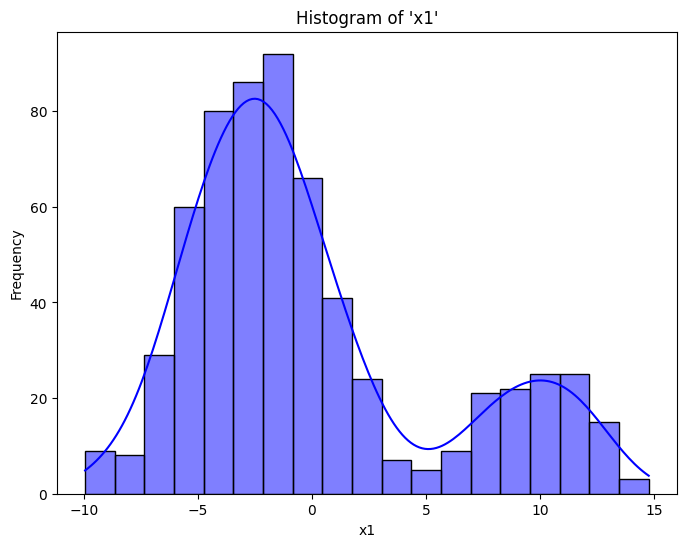

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['x1'], kde=True, color='blue')
plt.title("Histogram of 'x1'")
plt.xlabel('x1')
plt.ylabel('Frequency')
plt.show()

Plot in the same figure the histogram of two variables



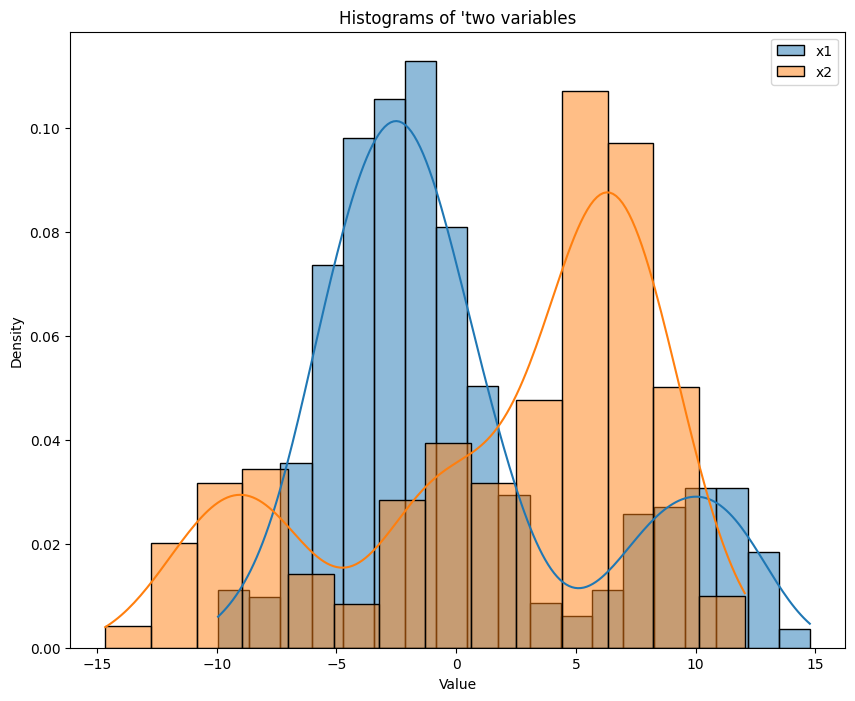

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(df['x1'], kde=True, label='x1', stat='density')
sns.histplot(df['x2'], kde=True, label='x2', stat='density')
plt.title("Histograms of 'two variables")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the boxplot of one of the variables

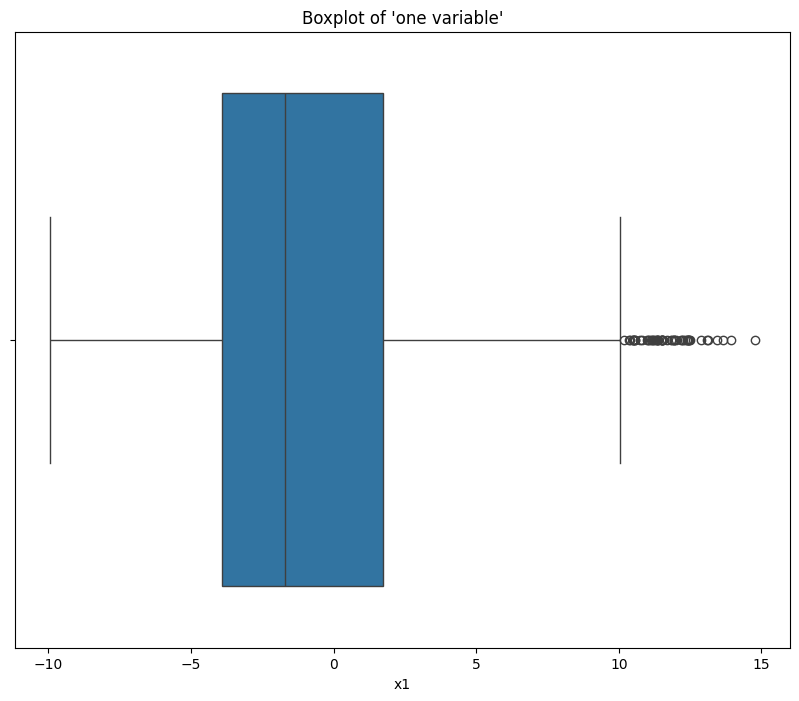

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['x1'])
plt.title("Boxplot of 'one variable'")
plt.xlabel('x1')
plt.show()

Plot in the same figure the boxplot of two variables

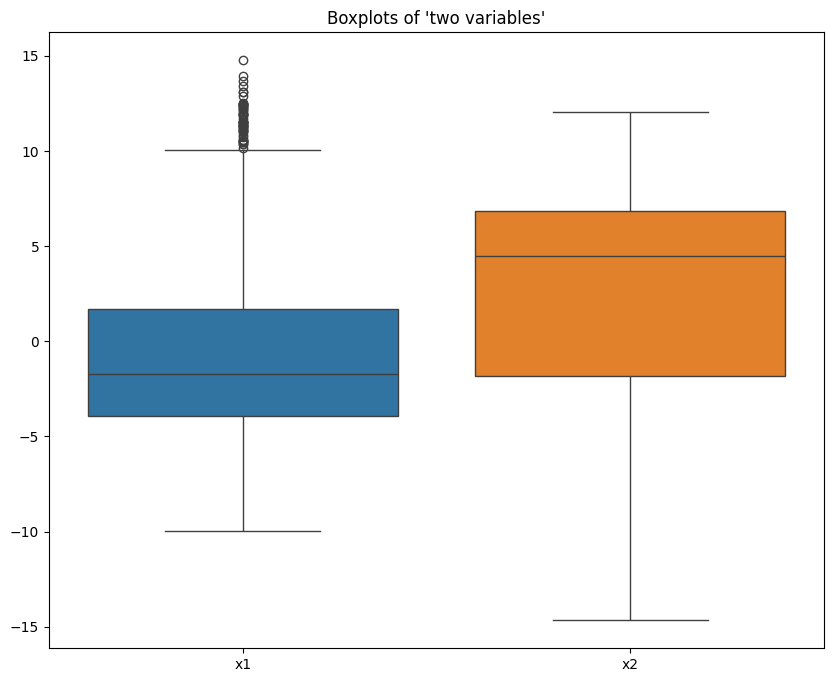

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['x1', 'x2']])
plt.title("Boxplots of 'two variables'")
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the scatter plot between all pair of variables

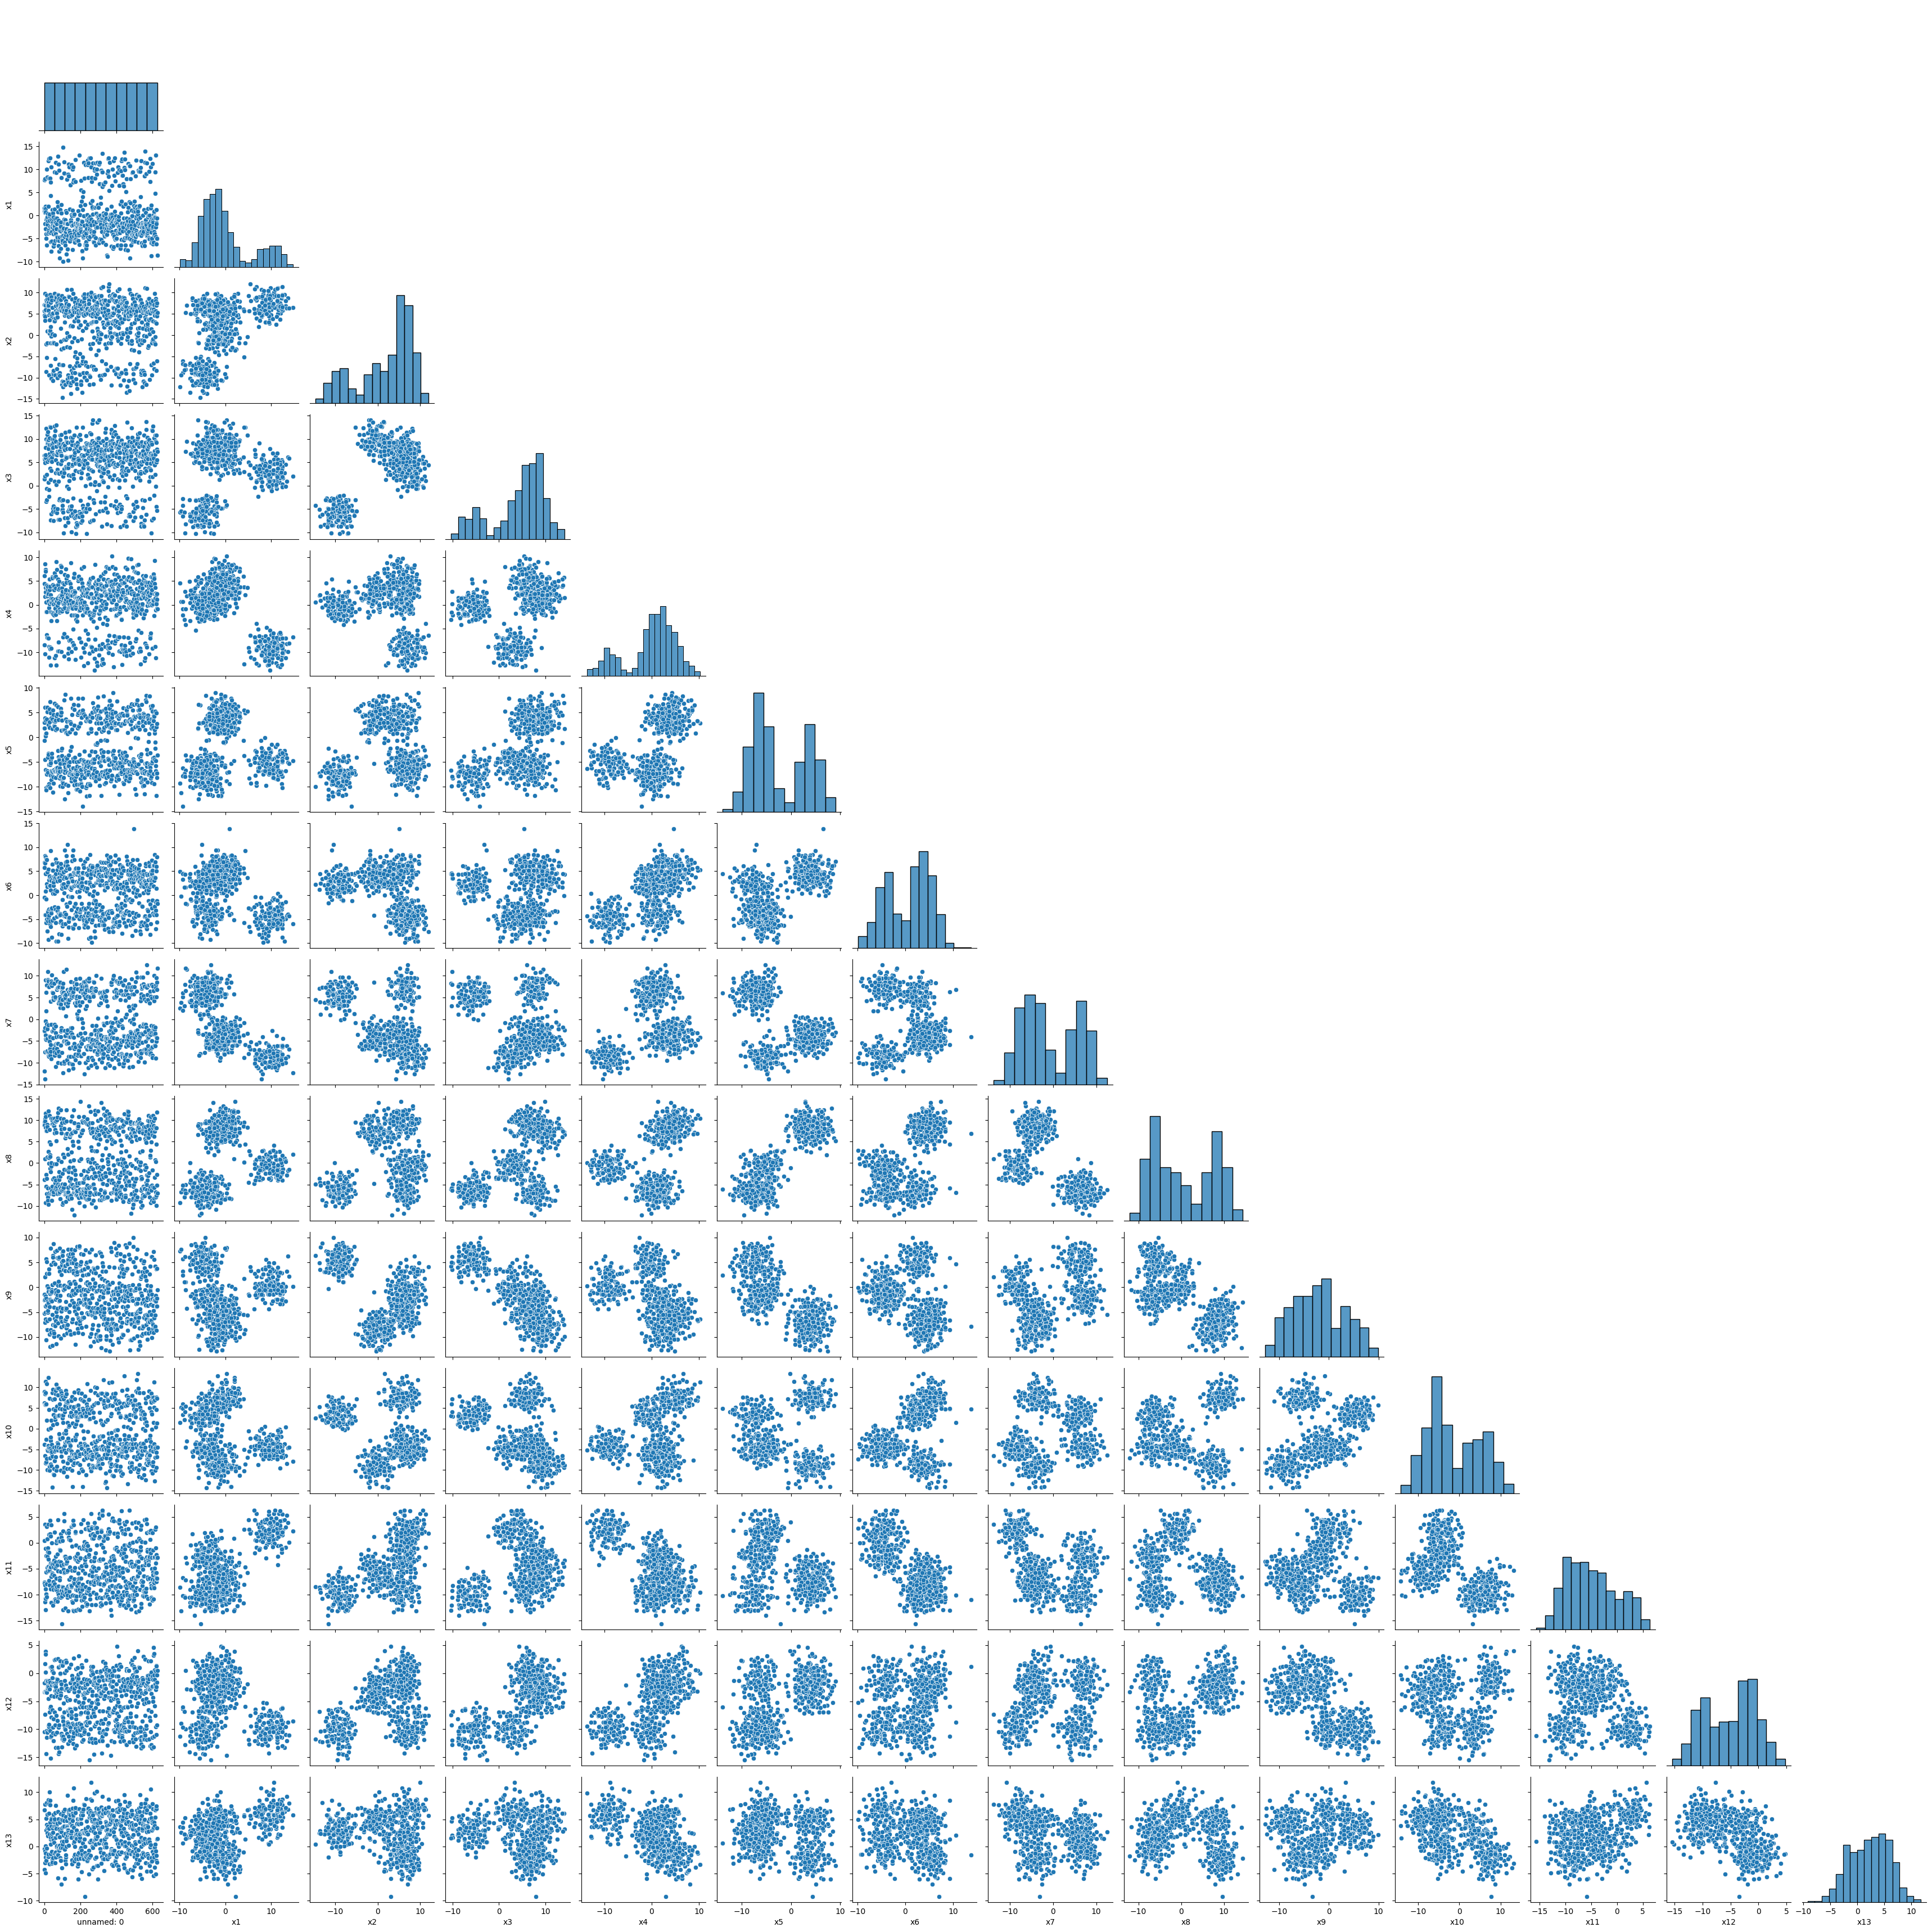

In [21]:
sns.pairplot(df, corner = True)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']])


KMeans(n_clusters=3, random_state=42)

Add to your dataset a column with the estimated cluster to each data point

In [23]:
df['Cluster'] = kmeans.labels_

Print the number associated to each cluster

In [24]:
print("\nCluster labels for each data point:")
print(df['Cluster'].value_counts())


Cluster labels for each data point:
Cluster
1    251
2    251
0    125
Name: count, dtype: int64


Print the centroids

In [25]:
print("Centroids:\n", kmeans.cluster_centers_)

Centroids:
 [[-4.75752575 -9.22488098 -5.76309539 -0.21145301 -7.63371619  2.58651165
   5.64347091 -6.1035354 ]
 [-0.80448916  2.60921579  7.85618759  3.82610742  3.91135569  4.63289459
  -4.04254839  8.36869044]
 [ 3.02274881  6.7711683   5.42157572 -3.92800239 -5.90615553 -4.42460504
  -0.60353481 -3.75548797]]


Print the intertia metric

In [26]:
print("Inertia:", kmeans.inertia_)

Inertia: 60639.259180809895


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

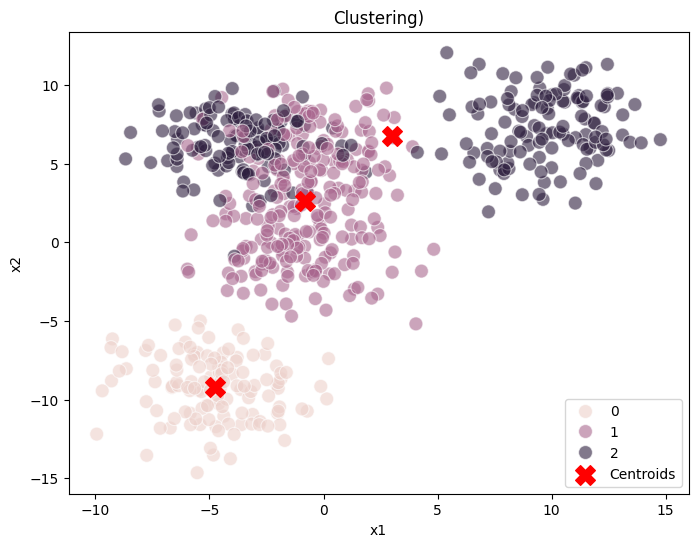

In [60]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['Cluster'], s=100, alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label="Centroids")

plt.title('Clustering)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

### Questions

Provides a detailed description of your results

Your response:
Los datos parecen estar condensados en 3 grupos particulares. Esta es la manera en la que el modelo entrenado (con los datos actuales) ha logrado clasificarlos. Las X o centroids hacen referencia al centro de los datos; es decir, el promedio geométrico del cluster.

## d) Elbow plot

Compute the Elbow plot

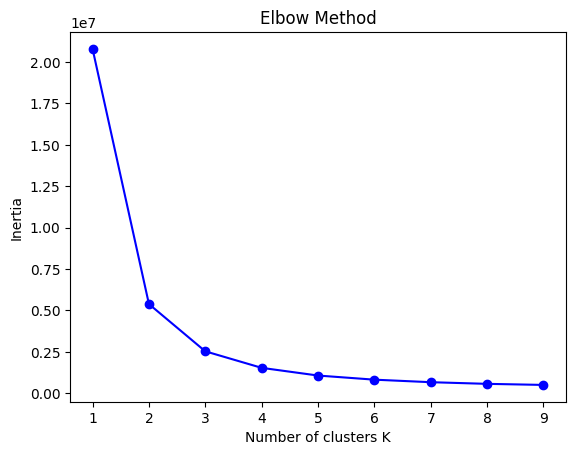

In [28]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df.iloc[:, :-1])
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
El cluster 3 es el mejor. Al principio, la estimación disminuye bruscamente del cluster 1 al 2. Sin embargo, esta disminución es mucho menos pronunciada del segundo al tercero. De igual manera, después de la tercera iteración, la disminución es cada vez menor, por lo que cada vez vale menos la pena seguir avanzando. Es por eso que la mejor es la tercera.



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [29]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load digits dataset
digits = load_digits()
X = digits.data    # Features (64 variables = 8x8 pixels)
y = digits.target  # Labels (digits 0-9)

print("Shape of data:", X.shape)  # Should be (1797, 64)
print("Shape of target:", y.shape)


Shape of data: (1797, 64)
Shape of target: (1797,)


2) Plot some of the observations (add in the title the label/digit of that obserbation)

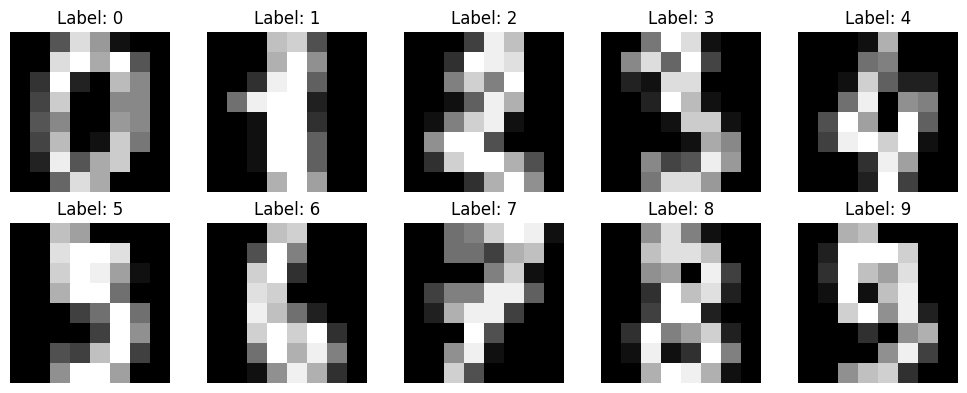

In [30]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [31]:
#All
kmeans_all = KMeans(n_clusters=10, random_state=0)
clusters_all = kmeans_all.fit_predict(X)

print("Cluster labels (all features):", np.unique(clusters_all))


Cluster labels (all features): [0 1 2 3 4 5 6 7 8 9]


In [32]:
#1row
X_1row = X[:, 0:8]
kmeans_1row = KMeans(n_clusters=10, random_state=0)
clusters_1row = kmeans_1row.fit_predict(X_1row)

print("Cluster labels (1st row):", np.unique(clusters_1row))


Cluster labels (1st row): [0 1 2 3 4 5 6 7 8 9]


In [33]:
#4row
X_4row = X[:, 24:32]
kmeans_4row = KMeans(n_clusters=10, random_state=0)
clusters_4row = kmeans_4row.fit_predict(X_4row)

print("Cluster labels (4th row):", np.unique(clusters_4row))


Cluster labels (4th row): [0 1 2 3 4 5 6 7 8 9]


In [34]:
#8row
X_8row = X[:, 56:64]
kmeans_8row = KMeans(n_clusters=10, random_state=0)
clusters_8row = kmeans_8row.fit_predict(X_8row)

print("Cluster labels (8th row):", np.unique(clusters_8row))


Cluster labels (8th row): [0 1 2 3 4 5 6 7 8 9]


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

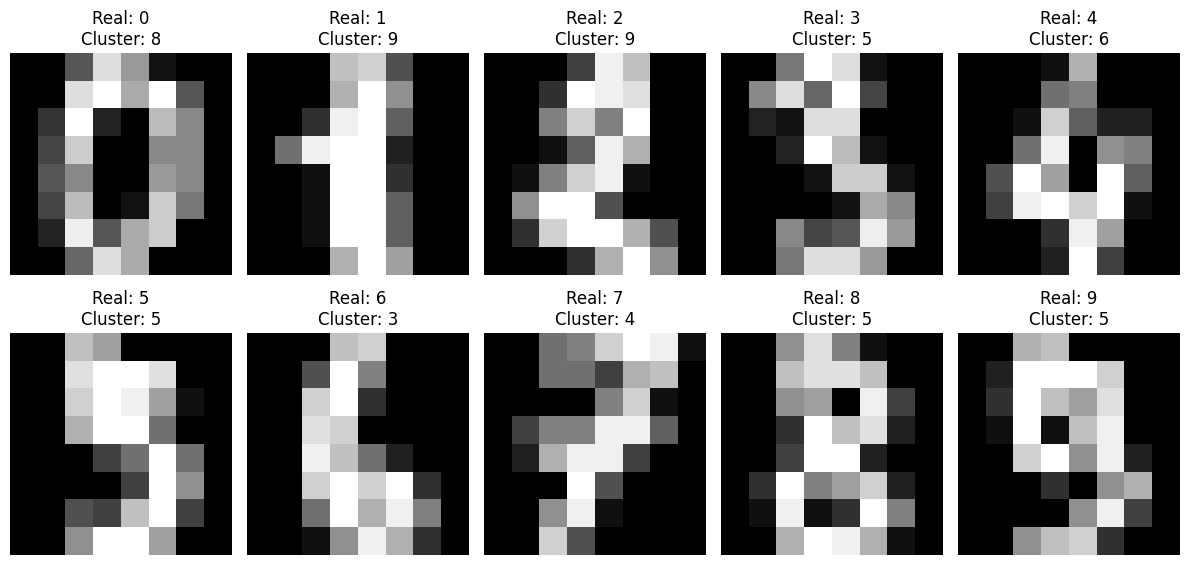

In [35]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Real: {y[i]}\nCluster: {clusters_all[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

5) Compute the Elbow plot

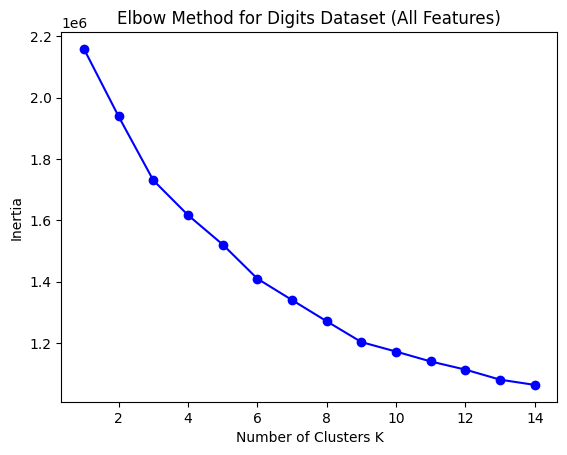

In [36]:
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Digits Dataset (All Features)')
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load digits dataset
digits = load_digits()
X = digits.data    # Features (64 variables = 8x8 pixels)
y = digits.target  # Labels (digits 0-9)

print("Shape of data:", X.shape)  # (1797, 64)
print("Shape of target:", y.shape)
print("Unique labels:", np.unique(y))

Shape of data: (1797, 64)
Shape of target: (1797,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

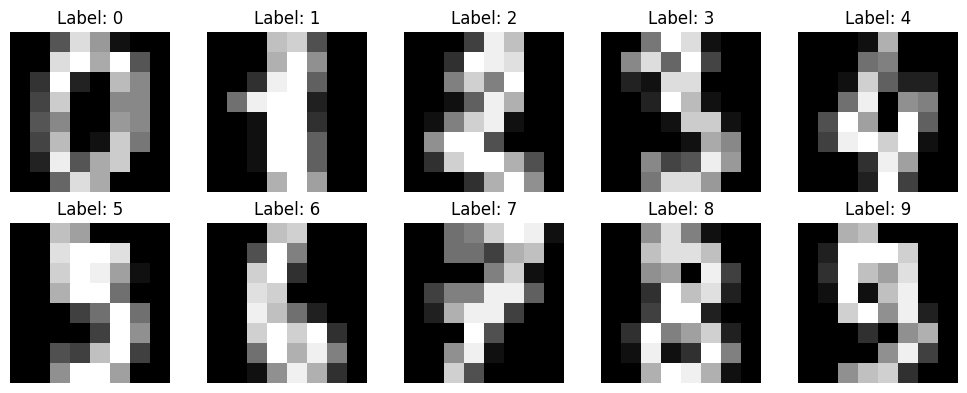

In [42]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

3) Split the dataset in train and test

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (1437, 64)
Test data shape: (360, 64)


4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [51]:
# ClassifierAll: 
svm_all = SVC(kernel='linear', random_state=42)
svm_all.fit(X_train, y_train)

# Classifier1col
X_test_1col = X_test[:, ::8]
X_train_1col = X_train[:, ::8]  # First column of pixels

svm_1col = SVC(kernel='linear', random_state=42)
svm_1col.fit(X_train_1col, y_train)

# Classifier4col
X_train_4col = X_train[:, 3::8]  
X_test_4col = X_test[:, 3::8]
svm_4col = SVC(kernel='linear', random_state=42)
svm_4col.fit(X_train_4col, y_train)

# Classifier8col
X_train_8col = X_train[:, 7::8]  
X_test_8col = X_test[:, 7::8]
svm_8col = SVC(kernel='linear', random_state=42)
svm_8col.fit(X_train_8col, y_train)

SVC(kernel='linear', random_state=42)

5) Make predictions (use the test set)

In [53]:
# 3) Make predictions (use the test set)
y_pred_all = svm_all.predict(X_test)
y_pred_1col = svm_1col.predict(X_test_1col)
y_pred_4col = svm_4col.predict(X_test_4col)
y_pred_8col = svm_8col.predict(X_test_8col)

6) Compute performance metrics

In [56]:
print("ClassifierAll (All 64 features):")
print(classification_report(y_test, y_pred_all))
print(f"Accuracy: {accuracy_score(y_test, y_pred_all)}\n")

print("Classifier1col (First column):")
print(classification_report(y_test, y_pred_1col))
print(f"Accuracy: {accuracy_score(y_test, y_pred_1col)}\n")

print("Classifier4col (Fourth column):")
print(classification_report(y_test, y_pred_4col))
print(f"Accuracy: {accuracy_score(y_test, y_pred_4col)}\n")

print("Classifier8col (Eighth column):")
print(classification_report(y_test, y_pred_8col))
print(f"Accuracy: {accuracy_score(y_test, y_pred_8col)}\n")

ClassifierAll (All 64 features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 0.9777777777777777

Classifier1col (First column):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.10      0.97     

/Users/bernardo/Downloads/ana/hola/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bernardo/Downloads/ana/hola/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bernardo/Downloads/ana/hola/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

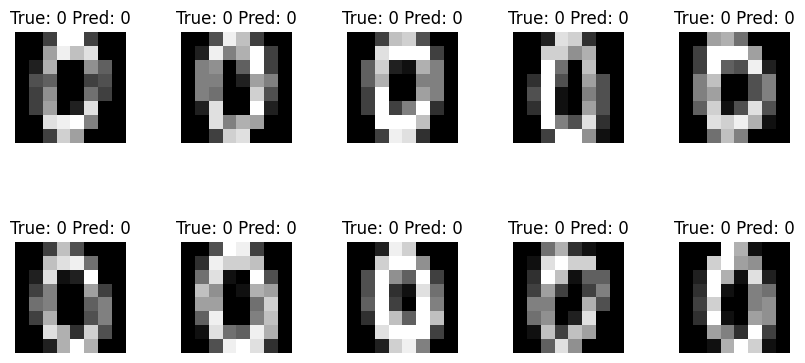

In [57]:
# 5) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

# For a specific digit (e.g., digit 0)
digit_label = 0
indices = np.where(y_test == digit_label)[0]

for i, index in enumerate(indices[:10]):  # Show the first 10 predictions for digit "0"
    axes[i].imshow(X_test[index].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"True: {y_test[index]} Pred: {y_pred_all[index]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

Durante mi carrera, he aprendido a recabar e interpretar datos en distintos tipos de proyectos: desde optativas de ciencia de datos hasta materias de matemáticas analíticas. Ahora, gracias a la facilidad de entrenar modelos de Machine Learning en Python, involucrarse en el mundo de la ciencia de datos es aún más accesible. Además, es muy importante conocer las métricas y el tipo de estudio a realizar para obtener predicciones, pues es en base a esto que determinaremos las preguntas necesarias y así poder construir un modelo adecuado. En otras palabras, es importante entender qué es lo que buscamos para hacer preguntas en términos de Machine Learning, programar el modelo de forma correcta e interpretar los resultados de manera significativa.

En general, sé que esta actividad me servirá en un futuro para mi crecimiento personal y profesional, ya que me ha brindado herramientas valiosas para enfrentar retos complejos mediante el uso de datos, tomar decisiones informadas y desarrollar soluciones basadas en evidencia. Esta experiencia reafirma mi interés por seguir explorando el campo de la inteligencia artificial y su impacto en distintos sectores de la sociedad.